In [239]:
import pandas as pd
import numpy as pd
import matplotlib as plot
import seaborn as sns
import plotly.express as px
import random as random

# 1. Creating the Deck and Card Classes

In [240]:
## card class

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

In [241]:
## deck class

class Deck:
    def __init__(self, num_sets=6): ## 6 decks is standard
        self.cards = [Card(s, r) for s in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for r in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace'] for _ in range(num_sets)]
        self.shuffle()
        self.plastic_index = random.randint(20, 30)

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

    def replace_plastic_card(self):
        self.cards.insert(self.plastic_index, self.draw())

    def __repr__(self):
        return f"Deck with {len(self.cards)} cards"

In [242]:
deck = Deck(num_sets=2)
print(deck)

hand_size = 3
hand = [deck.draw() for i in range(hand_size)]
print("Hand:", hand)

print(deck)

Deck with 104 cards
Hand: [4 of Diamonds, 8 of Clubs, King of Diamonds]
Deck with 101 cards


#2. UML diagram

In [243]:
#pdf included in submision

# 3. Skeleton

In [244]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"  # Return a string representation of the card

class Deck:
    def __init__(self, num_sets=6):
        self.num_sets = num_sets  # num of card sets in the deck
        self.cards = []  # empty ist
        self.plastic_index = None  # index of the plastic card

    def shuffle(self):
        pass

    def draw(self):
        pass

    def replace_plastic_card(self):
        pass

    def __repr__(self):
        pass

class Player:
    def __init__(self, name, chips=100):
        self.name, self.chips, self.hand = name, chips, []

    def bet(self):
        pass

    def win(self, amount):
        pass

    def lose(self, amount):
        pass

class CountingPlayer(Player):
    def __init__(self, name, threshold):
        super().__init__(name)  # calls the parent class constructor
        self.threshold, self.count = threshold, 0
    def update_count(self, card):
        pass

    def decide(self):
        pass

class Dealer(Player):
    def decide(self):
        pass  #hit or stay

def simulate_round(players, deck):
    pass

def simulate_game():
    pass

#4. code logic of all functions, implement dealer and human player

In [245]:
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class HumanPlayer(Player): pass

#5. Demonstrate game play with several dealers

In [246]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, n =1):
        self.cards = [Card(s, r) for s in 'Hearts Diamonds Clubs Spades'.split() for r in '2 3 4 5 6 7 8 9 10 Jack Queen King Ace'.split() for _ in range(n)]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class Game:
    def __init__(self, n):
        self.deck = Deck()
        self.players = [Dealer() for _ in range(n)] + [Player("Human")]

    def deal(self):
        for _ in range(2):
            for p in self.players:
                p.hand.append(self.deck.draw())

    def play_round(self):
        self.deal()
        for p in self.players:
            print(f"{p.name}'s hand:", p.hand)

In [209]:
game_1 = Game(5)

for i in range(1,5):
    print(f"Round {i}:")
    game_1.play_round()
    print()

Round 1:
Dealer's hand: [King of Spades, 3 of Clubs]
Dealer's hand: [2 of Diamonds, Queen of Hearts]
Dealer's hand: [King of Clubs, 3 of Diamonds]
Dealer's hand: [8 of Diamonds, 2 of Clubs]
Dealer's hand: [Ace of Spades, 9 of Hearts]
Human's hand: [4 of Hearts, 8 of Hearts]

Round 2:
Dealer's hand: [King of Spades, 3 of Clubs, Jack of Spades, 8 of Spades]
Dealer's hand: [2 of Diamonds, Queen of Hearts, 5 of Diamonds, Ace of Diamonds]
Dealer's hand: [King of Clubs, 3 of Diamonds, 7 of Clubs, 3 of Spades]
Dealer's hand: [8 of Diamonds, 2 of Clubs, Ace of Clubs, Queen of Diamonds]
Dealer's hand: [Ace of Spades, 9 of Hearts, Queen of Clubs, 10 of Clubs]
Human's hand: [4 of Hearts, 8 of Hearts, Jack of Diamonds, 8 of Clubs]

Round 3:
Dealer's hand: [King of Spades, 3 of Clubs, Jack of Spades, 8 of Spades, 3 of Hearts, 4 of Clubs]
Dealer's hand: [2 of Diamonds, Queen of Hearts, 5 of Diamonds, Ace of Diamonds, 10 of Hearts, 2 of Hearts]
Dealer's hand: [King of Clubs, 3 of Diamonds, 7 of Clubs

#6. Implement player with certain strategy

In [247]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

player =  CardCounter("Counting Player")
cards = [Card('Hearts', '2'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for card in cards:
    player.update_count(card)

print("Decision:", player.decide())

Decision: Stay


In [248]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

In [249]:
player = CardCounter("Counting Player")
cards = [Card('Hearts', '1'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for i in cards:
    player.update_count(i)

print("Decision:", player.decide())

Decision: Hit


#7. Test Scenario

In [250]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):


        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    if len(deck) < (len(players) * 2 + 1):
        return
    for i in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CardCounter) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())
    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())
    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player,   CardCounter):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:
                player.win(player.bet())

In [252]:
def simulate_game():


    dealer = Dealer("Dealer")
    strategy_player =CardCounter("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    rounds = 0

    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)
    return strategy_player.chips - 100

winnings = simulate_game()
print("Strategy Player's Winnings:", winnings)

UnboundLocalError: local variable 'player' referenced before assignment

#8. Histrogram winnings


In [253]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    if len(deck) < (len(players) * 2 + 1):
        return

    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:
                player.win(player.bet())

def simulate_game():
    dealer = Dealer("Dealer")
    strategy_player = CardCounter("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    rounds = 0
    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)

    return strategy_player.chips - 100

In [254]:
import matplotlib.pyplot as plt
import numpy as np

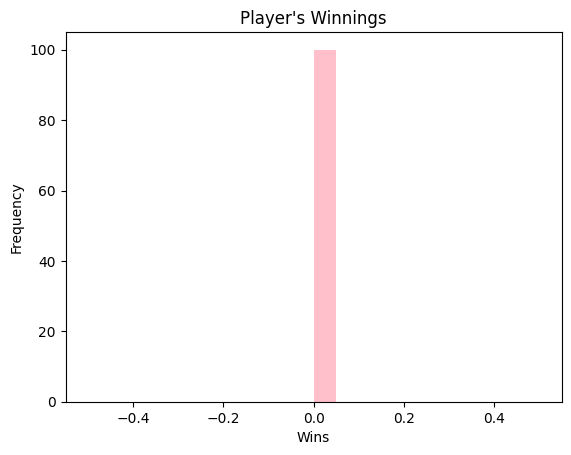

Average Winnings per Round: 0.0
Standard Deviation of Winnings: 0.0
Probability of Net Winning after playing 50 rounds: 0.0
Probability of Net Losing after playing 50 rounds: 0.0


In [255]:
game_results = []
for i in range(100):
    winnings = simulate_game()
    game_results.append(winnings)


## plotting winnings
plt.hist(game_results, bins=20, color='pink')
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.title("Player's Winnings")
plt.show()

# mean
avg_win = np.mean(game_results) / 50
print("Average Winnings per Round:", avg_win)

# stdev
std_win = np.std(game_results)
print("Standard Deviation of Winnings:", std_win)

# prob. of winning or losing after x rounds
prob_win = sum(1 for result in game_results if result > 0) / len(game_results)
prob_lost = sum(1 for result in game_results if result < 0) / len(game_results)
print("Probability of Net Winning after playing 50 rounds:", prob_win)
print("Probability of Net Losing after playing 50 rounds:", prob_lost)

#9. Trying diff threshold values

In [256]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def card_value(self):
        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        self.count = 0

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and deck:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

In [268]:
def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CardCounter(threshold)
    other_players = [Player() for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    for i in range(50):
        if deck:
            simulate_round(players, deck)
        else:
            break

    return strategy_player.chips - 100


thres_vals = [-3, -2, -1, 0, 2]  # 1st Threshold values
average_winnings_per_rounds = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for i in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -3


In [267]:
thres_vals = [-4, -2, 0, 1, 2]  # 1st Threshold values
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


In [266]:
thres_vals = [-1, 0, 1, 2, 3]  # 1st Threshold values
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


In [265]:
thres_vals = [0, 1, 2, 3, 4, 5]
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)]
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


In [264]:
thres_vals = [-5, -4, -3, -2, -1]
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)]
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


#10. Original Strategy

In [262]:
class Card:
    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank
    def card_value(self):


        return 1 if self.rank in '1357' else 0 if self.rank in '567' else -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips
    def bet(self):
        return 1
    def win(self, amount):


        self.chips += amount
    def lose(self, amount):
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
    def decide(self, hand_value):

        return "Stay" if hand_value >= 18 else "Hit"

class Dealer(Player):
    def decide(self):
        return "Stay" if sum(c.card_value() for c in self.hand) >= 17 else "Hit"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop() for _ in range(2)]
    dealer = players[0]
    dealer.hand.append(deck.pop())
    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide(sum(c.card_value() for c in player.hand)) == "Hit" and deck:
            player.hand.append(deck.pop())


    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())
    dealer_value = sum(c.card_value() for c in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(c.card_value() for c in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CountingPlayer(threshold)
    other_players = [Player() for _ in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(s, str(r)) for s in 'Hearts Diamonds Clubs Spades'.split() for r in range(1, 14)]
    random.shuffle(deck)
    for _ in range(50):
        if deck:
            simulate_round(players, deck)
        else:
            break
    return strategy_player.chips - 100

In [263]:
thres_vals = [-5, -4, -3, -2, -1]
avg_win_new= [np.mean([simulate_game(i) for j in range(100)]) / 50 for i in thres_vals]
optimal_threshold = thres_vals[np.argmax(avg_win_new)]

print("Improved Method's optimal threshold val:", optimal_threshold)

Improved Method's optimal threshold val: -5


We have an improvement in our results